<a href="https://colab.research.google.com/github/sivaprakashkoka/Urban-Airpollution-Challenge/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv("completed_train.csv")

In [ ]:
data.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,Month
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,72204.276756,0.252417,-1.231330,840209.874619,-0.000127,0.312521,-0.000040,-1.861476,0.000000,1
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,99353.672374,0.315403,-1.082553,840772.941995,0.000150,0.433957,0.000050,-1.452612,0.059433,1
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,95671.383578,0.307463,-1.001241,841410.713456,0.000150,0.356925,0.000053,-1.572950,0.082063,1
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,96232.486418,0.279637,-0.777023,841103.242368,0.000227,0.584522,0.000110,-1.239317,0.121261,1
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,52561.523079,0.238241,0.366324,840763.055499,0.000390,0.408047,0.000159,0.202489,0.037919,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30554 entries, 0 to 30553
Data columns (total 47 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30554 non-null  object 
 1   Date                                                 30554 non-null  object 
 2   Place_ID                                             30554 non-null  object 
 3   target                                               30554 non-null  float64
 4   target_min                                           30554 non-null  float64
 5   target_max                                           30554 non-null  float64
 6   target_variance                                      30554 non-null  float64
 7   target_count                                         30554 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30554 non-nul

In [ ]:
y = data['target']
X = data.drop(['target', 'Place_ID X Date', 'Date', 'Place_ID'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2816      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
764/764 [==============================] - 2s 2ms/step - loss: 1287.8434 - mse: 1287.8434 - val_loss: 477.8342 - val_mse: 477.8342
Epoch 2/100
764/764 [==============================] - 2s 2ms/step - loss: 437.6694 - mse: 437.6694 - val_loss: 396.0335 - val_mse: 396.0335
Epoch 3/100
764/764 [==============================] - 2s 2ms/step - loss: 375.7808 - mse: 375.7808 - val_loss: 362.4558 - val_mse: 362.4558
Epoch 4/100
764/764 [==============================] - 1s 2ms/step - loss: 343.7027 - mse: 343.7027 - val_loss: 336.7028 - val_mse: 336.7028
Epoch 5/100
764/764 [==============================] - 2s 2ms/step - loss: 321.7490 - mse: 321.7490 - val_loss: 315.4760 - val_mse: 315.4760
Epoch 6/100
764/764 [==============================] - 2s 2ms/step - loss: 307.2011 - mse: 307.2011 - val_loss: 306.6441 - val_mse: 306.6441
Epoch 7/100
764/764 [==============================] - 1s 2ms/step - loss: 296.3094 - mse: 296.3094 - val_loss: 298.8840 - val_mse: 298.8840
Epoch 8/100

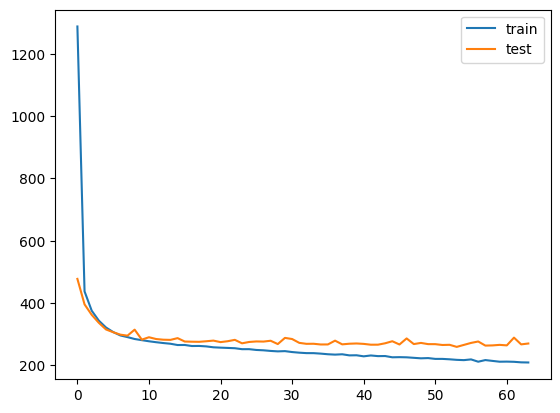

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R^2:', r2)

191/191 [==============================] - 0s 928us/step
RMSE: 16.11238266514447
R^2: 0.8839107387326971


In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [ ]:
def create_model(hidden_layers, neurons, learning_rate):
    model = Sequential()
    for i in range(hidden_layers):
        model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    return model

In [ ]:
estimator.get_params().keys()

NameError: ignored

In [ ]:
model = KerasRegressor(build_fn=create_model, verbose=0)

param_dist = {'hidden_layers': sp_randint(2, 5),
              'neurons': sp_randint(32, 256),
              'learning_rate': sp_uniform(0.001, 0.1)}

n_iter_search = 20
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, verbose=2, n_jobs=-1)
random_search_result = random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search_result.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits


ValueError: ignored

In [ ]:
best_model = create_model(hidden_layers=random_search_result.best_params_['hidden_layers'],
                          neurons=random_search_result.best_params_['neurons'],
                          learning_rate=random_search_result.best_params_['learning_rate'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_hy = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
764/764 [==============================] - 2s 2ms/step - loss: 594.2698 - mse: 594.2698 - val_loss: 436.2918 - val_mse: 436.2918
Epoch 2/100
764/764 [==============================] - 2s 2ms/step - loss: 414.5165 - mse: 414.5165 - val_loss: 330.2338 - val_mse: 330.2338
Epoch 3/100
764/764 [==============================] - 2s 2ms/step - loss: 358.4985 - mse: 358.4985 - val_loss: 345.2799 - val_mse: 345.2799
Epoch 4/100
764/764 [==============================] - 2s 2ms/step - loss: 334.6528 - mse: 334.6528 - val_loss: 326.4421 - val_mse: 326.4421
Epoch 5/100
764/764 [==============================] - 1s 2ms/step - loss: 330.7890 - mse: 330.7890 - val_loss: 319.2127 - val_mse: 319.2127
Epoch 6/100
764/764 [==============================] - 2s 2ms/step - loss: 298.0362 - mse: 298.0362 - val_loss: 572.0281 - val_mse: 572.0281
Epoch 7/100
764/764 [==============================] - 2s 2ms/step - loss: 331.9557 - mse: 331.9557 - val_loss: 287.2415 - val_mse: 287.2415
Epoch 8/100
7

In [ ]:
y_pred_hy = best_model.predict(X_test)

# Calculate the RMSE and R-squared values
rmse_hy = np.sqrt(mean_squared_error(y_test, y_pred_hy))
r2_hy = r2_score(y_test, y_pred_hy)

print('RMSE:', rmse)
print('R-squared:', r2_hy)

191/191 [==============================] - 0s 962us/step
RMSE: 16.236495588298403
R-squared: 0.8823106028952208
